# Hypotesetest for lineær regresjon

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et siste eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet, at stigningstallet for den beste funskjonen på formen

$$F(t) = x_1 t + x_2 + x_3 \sin(\frac{2\pi t}{ 365.2425}) + x_4 \cos(\frac{2\pi t}{ 365.2425})$$

som tilnærmer sannsynlighetsfordelingen 
som temperaturmålingene er trukket fra, er større enn stigningstallet til linjen som vokser med vekstraten $\widetilde x_{1} = 1 \ C^{\circ}$ på 40 år.

Jeg vil bruke alle de daglige temperaturmålingene i datasettet vårt 
for å teste denne hypotesen.

Jeg antar at temperaturene er trukket fra en sannsynlighetsfordeling som har en beste lineær lilnærming på formen

$$F(t) = x_1 t + x_2 + x_3 \sin(\frac{2\pi t}{ 365.2425}) + x_4 \cos(\frac{2\pi t}{ 365.2425})$$

At $F(t)$ er en beste lineær tilnærming betyr at $x_1$, $x_2$, $x_3$ og $x_4$ er valgt slik at gjennomsnittsverdien til tallet $F(t) - y$ er minst mulig for et tilfeldig
trukket par $(t, y)$ av en tid $t$ og en temperatur $y$ til tiden $t$. For at teorien bak hypotesetesten skal fungere må størrelsen $F(t) - y$ være normalfordelt.

Hypotesen min kan formuleres som følger:

**Antatt stigningstall** $\widetilde x_1 = \frac{1 \ C^{\circ}}{\text{antall dager på 40 år}} = \frac{1 \ C^{\circ}}{14609.6 \text{ dager}} = 6.8448 \cdot 10^{-5}\ C^{\circ}/\text{dag}$

**Nullhypotese ($H_0)$:** $x_1 = \widetilde x_1$.

**Alternativ hypotese ($H_1$):** $x_1  > \widetilde x_1$.

## Temperaturdata

Jeg laster inn temperaturdata gitt ved tidspunkter $t_1, t_2, \dots t_n$ og tilhørende temperaturer $y_1, y_2, \dots, y_n$.
Jeg skriver 
$\mathbf{t} = [t_1, t_2, \dots, t_n]$ for punktet i $\mathbb{R}^n$ gitt ved tidene og 
$\mathbf{y} = [y_1, y_2, \dots, y_n]$ for punktet i $\mathbb{R}^n$ gitt ved temperaturene.

Jeg vil skrive 
$$F_{\mathbf{t},\mathbf{y}}(t) = 
x_1(\mathbf{t},\mathbf{y}) t + 
x_2(\mathbf{t},\mathbf{y}) +
x_3(\mathbf{t},\mathbf{y}) \sin(\frac{2\pi t}{ 365.2425}) +
x_4(\mathbf{t},\mathbf{y}) \cos(\frac{2\pi t}{ 365.2425})
$$
for den svingende regresjonslinjen gjennom datapunktene. I forrige uke så vi hvordan vi beregner 
$x_1(\mathbf{t},\mathbf{y})$,
$x_2(\mathbf{t},\mathbf{y})$,
$x_3(\mathbf{t},\mathbf{y})$,
og
$x_4(\mathbf{t},\mathbf{y})$.


In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats



In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [7]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()


In [8]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [9]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [10]:
#Vi leser inn tiden talt i dager fra første måling
t = (np.array(data.index) - np.array(data.index)[0]).astype(np.timedelta64(1, 'D')).astype(float)[:, None]

In [11]:
y = data['tavg_ffill'].values[:, None].astype(float)

In [10]:
#Vi leser inn tiden talt i dager fra første måling
tt = (np.array(data.index) - np.array(data.index)[0]).astype(np.timedelta64(1, 'D')).astype(float)[:, None]

In [11]:
# Beregner rullende gjennomsnitt
data['Rolling_Mean_tavg'] = data['tavg_ffill'].rolling(25 * 365, center=True).mean()

In [12]:
y = data['Rolling_Mean_tavg'].values[:, None].astype(float)

In [13]:
t = tt[np.isfinite(y)][:, None]

In [14]:
y = y[np.isfinite(y)][:, None]

In [12]:
B = np.hstack([t, np.ones_like(t), np.sin((2 * np.pi * t) / 365.2425), np.cos((2 * np.pi * t) / 365.2425)])#, np.sin((4 * np.pi * t) / 365), np.cos((4 * np.pi * t) / 365)])

På samme måten som vi fant koeffisienter for konstant- og lineært bidrag kan vi finne koeffisienter for de periodiske bidragene også:

In [13]:
xxx = np.linalg.solve(B.T @ B, B.T @ y)

Vi finner fire koeffisienter:

In [14]:
xxx

array([[ 6.92671039e-05],
       [ 7.56547040e+00],
       [-2.49888357e+00],
       [-6.35006031e+00]])

In [15]:
F = B @ xxx
data['årlig_forutsigelse'] = F

In [16]:
data['trend'] = B[:, :2] @ xxx[:2]

<Axes: xlabel='time'>

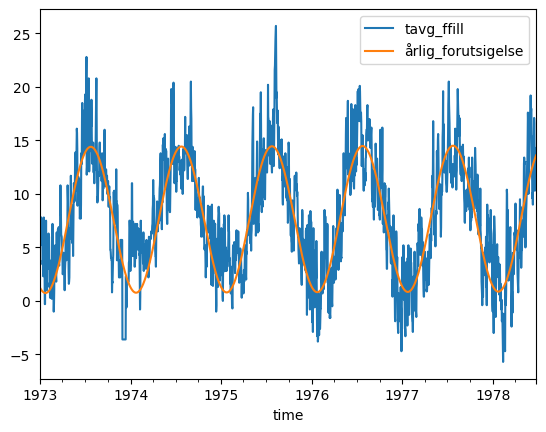

In [17]:
data.loc[start: start + timedelta(days=2000)].plot(y=['tavg_ffill', 'årlig_forutsigelse'])

La oss se om feilen til den svingende regresjonen er normalfordelt:

In [18]:
data['årlig_residual'] = data['årlig_forutsigelse'] - data['tavg_ffill']

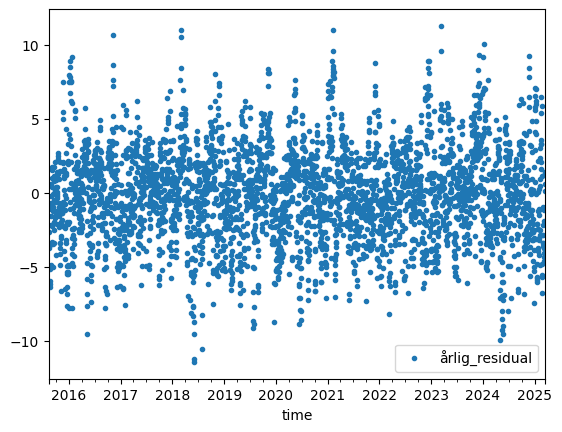

In [19]:
data.loc[end - timedelta(weeks=500): end].plot(y=['årlig_residual',], style='.');

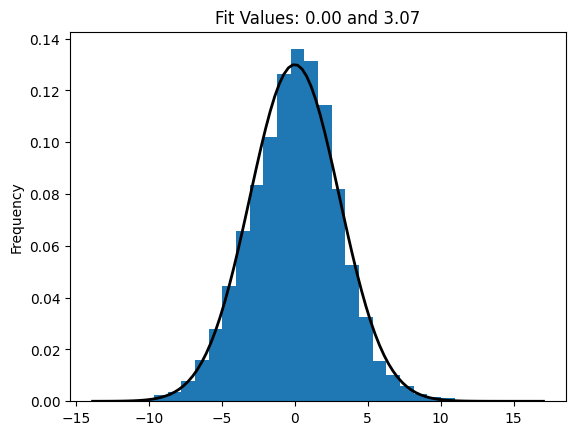

In [20]:
mu, std = scipy.stats.norm.fit(data['årlig_residual'])
data['årlig_residual'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title);

**Det ser bra ut!**

## Test av stigningstall i regresjon

Standardavviket for estimeringen av $x_1$ kan tilnærmes med formelen:

$$\sigma(x_1(\mathbf{t},\mathbf{y})) =\frac{ 1}{\sigma(\mathbf{t})}  \sqrt{\frac{\operatorname{SSR(L, \mathbf{t}, \mathbf{y}})}{n-2}} $$

Hvor
$$\operatorname{SSR(L, \mathbf{t}, \mathbf{y}}) = (y_1 - L(t_1))^2 + \dots + (y_n - L(t_n))^2$$
og
$\sigma(\mathbf{t})^2 = E(\mathbf{t}^2) - E(\mathbf{t})^2$.


$t$-verdien for hypotesen om at det underliggende stigningstallet $x_1$ er lik $\widetilde x_1$ er gitt ved formelen
$$t = \frac{x_1(\mathbf{t},\mathbf{y}) - \widetilde x_1}{\sigma(x_1(\mathbf{t},\mathbf{y}))}.$$

Antallet av frihetsgrader er $n$ minus antall parametre som estimeres. Vi estimerer parametrene $x_1$ og $x_2$, så
antallet av frihetsgrader er $n - 2$.

Vi er nå klar til å avgjøre om nullhypotesen vår skal forkastes:

Vi kan se på $x_1$ som en funksjon av $t$-verdien:

$$x_1 = x_1(\mathbf{t},\mathbf{y})  - t  {\sigma(x_1(\mathbf{t},\mathbf{y}))}.$$

In [21]:
antall_frihetsgrader = len(y) - 4
x1tilde = -1 / (365.2425 * 50)
SSR_av_F_t_y = np.sum((y - F)**2)
sigmaxx1 = np.sqrt(SSR_av_F_t_y / (len(y) - 2)) / np.std(t)
t_verdi = (xxx[0, 0] - x1tilde)/(sigmaxx1)

In [22]:
t_verdi

np.float64(0.22241322076047088)

In [23]:
np.std(t)

np.float64(5503.880108614286)

In [24]:
sigmaxx1

np.float64(0.0005576343150421211)

In [25]:
SSR_av_F_t_y / (len(y) - 2)

np.float64(9.419696543069525)

In [26]:
SSR_av_F_t_y

np.float64(179577.09489707745)

In [27]:
t

array([[0.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       ...,
       [1.9063e+04],
       [1.9064e+04],
       [1.9065e+04]], shape=(19066, 1))

In [28]:
y

array([[7. ],
       [7.6],
       [5.2],
       ...,
       [3.7],
       [3.1],
       [3.1]], shape=(19066, 1))

In [29]:
F

array([[1.21541009],
       [1.17343332],
       [1.13334815],
       ...,
       [4.31079188],
       [4.39863489],
       [4.48780583]], shape=(19066, 1))

In [30]:
SSR_av_F_t_y / (len(y) - 4)

np.float64(9.420684865023473)

In [31]:
xxx[0, 0]

np.float64(6.926710387530708e-05)

In [32]:
x1tilde

-5.475814013977015e-05

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $n-2$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturen $y$ er fordelt etter en normalfordeling med gjennomsnittsverdi $\mu$ og standardavvik $\sigma$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at $\mu \le \mu_0$ og sannsynligheten for at $\mu > \mu_0$.

Hvis sannsynligheten for nullhypotesen $H_0$: $\mu \le \mu_0$ er veldig liten velger vi å forkaste nullhypotesen. 

Vi må på forhånd bestemme oss for hva vi mener med veldig liten. 

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [33]:
# t-verdi og antall frihetsgrader

antall_frihetsgrader = len(y) - 4
float(t_verdi), antall_frihetsgrader

(0.22241322076047088, 19062)

In [34]:
t_verdi

np.float64(0.22241322076047088)

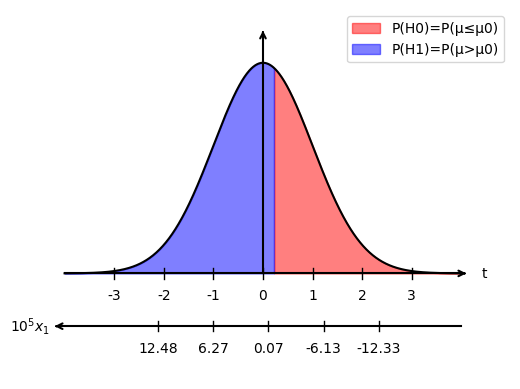

In [40]:
# @title plot
import matplotlib.pyplot as plt
import numpy as np

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = t_verdi

def t_av_mu(m):
    return (xx1 - m)/(sigmaxx1)
# def mu_av_t(t):
#     return Ey - t*(sigmay/np.sqrt(len(y)))
    
ax = plt.gca()


plt.plot(x, yy, color='black')
plt.fill_between(x, yy, where=(x > t_crit), color='red', alpha=0.5, label=r'P(H0)=P(μ≤μ0)')
plt.fill_between(x, yy, where=(x < t_crit), color='blue', alpha=0.5, label=r'P(H1)=P(μ>μ0)')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.2, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)  
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)  
ax.annotate("", xy=(-4.2, -.1), xytext=(-4.1, -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(-5.1, -.1, r"$10^5 x_1$", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)  
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"y", verticalalignment="center")

# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for ti in ticks:
    ax.plot([ti, ti], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.05, f"{ti}", fontsize=10, ha="center")  # Labels below ticks

#Set ticks for μ-axis
xx1 = xxx[0, 0]
xxdiff = (xx1 - x1tilde)
mu_verdier = np.arange(xx1 - 10.5*xxdiff, xx1 + 10.5*xxdiff, 10*xxdiff/2)
muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
for ti, mu in zip(muticks, mu_verdier):
    ax.plot([ti, ti], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.15, f"{10000*mu:.2f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.show()


Arealet til det røde området på figuren under er sannsynligheten for at nullhypotesen er sann.

Nullhypotesen $\mu = \mu_0$ (eller $\mu \le \mu_0$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu > \mu_0$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

Som for normalfordelingen kan scipy hjelpe oss med å finne dette arealet:

In [ ]:
# p-verdi
1 - scipy.stats.t.cdf(t_verdi, df=antall_frihetsgrader)

In [ ]:
# Siden t-funksjonen er symmetrisk fås samme verdi ved å integrere frem til -t_verdi
p_verdi = scipy.stats.t.cdf(-t_verdi, antall_frihetsgrader)

In [ ]:
#vi får p-verdien

float(100 * p_verdi)

Vi kan altså forkaste nullhypotesen som sier at temperaturen i Bergen ikke er steget med mere enn en grad celsius med et signifikansnivå på 2.8%.

**Konklusjon:**

Temperaturen i Bergen er steget med mere enn en grad per 40 år.